# Kiểm định giả thuyết (Hypothesis testing)
Thực hiện 4 bước
1. Thiệt lập giả thuyết $H_0, H_a$ và chọn mức ý nghĩa/ngưỡng chấp nhận/độ không chắc chắn/độ tin cậy $\alpha$
2. Xác định dạng kiểm định (binomial-test, z-test, t-test, chi-square-test, f-test)
3. Tính p-value
4. Đối chiếu p-value với mức ý nghĩa đã chọn

## Kiểm định giá trị thống kê

**Bài toán 1 (binomial-test): nữ sinh bị gọi lên bảng trả bài nhiều hơn nam đúng hay sai?**

- gọi tên 50 người thì thấy tỉ lệ nam/nữ như sau: `n_boys` = 14, `n_girls` = 36

1. Thiết lập giả thuyết
    - $H_0$ cho rằng nữ bị gọi là do tình cờ (happend by chance) nghĩa là xác suất bị gọi $p \le 0.5$
    - $H_a$ cho rằng nữ bị gọi là do thiên vị (not by chance) nghĩa là xác suất bị gọi $p > 0.5$
    - Chọn mức ý nghĩa $\alpha = 5\%$. Nếu tỉ lệ nữ bị gọi nhiều hơn 36 có xác suất nhỏ hơn 5% thì ta sẽ loại bỏ $H_0$.
2. Xác định dạng kiểm định:
    - Đây là binomial-test với $p = 0.5$
3. Tính p-value (chính là Zscore)  

In [53]:
n_boys, n_girls = 14, 36
n = n_boys + n_girls
alpha = 0.05
p = 0.51
p_value = scipy.stats.binom.pmf(n_girls, n, p)
print('p_value = ', p_value)

# reject H0 or not
if p_value < alpha:
    print( "Reject H0 => nữ bị gọi là do thiên vị")
else:
    print( "Accept H0 => nữ bị gọi là do tình cờ")

p_value =  0.0012805685488382526
Reject H0 => nữ bị gọi là do thiên vị


**Bài toán 2 (z-test): test khả năng thắng cử của ứng cử viên**

1. Thiết lập giả thuyết
    - $H_0: p \le 0.5$ - ứng viên thua cử
    - $H_a: p > 0.5$ - ứng viên thắng cử
    - Chọn mức ý nghĩa $\alpha = 5\%$.
2. Xác định dạng kiểm định:
    - Đây là z-test với $z_p = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{n}}}$
3. Tính p-value (chính là Zscore) 

In [54]:
# sample
n = 500
p_hat = yes = 0.54
p_0 = 0.5
z_p = (p_hat - p_0)/(math.sqrt(p_0 * (1 - p_0) / n))

# one_tail test
z_cdf = scipy.stats.norm.cdf(z_p)
p_value = 1 - z_cdf

print('p_value = ', p_value)

# reject H0 or not
if p_value < alpha:
    print( "Reject H0 => ứng viên thắng cử")
else:
    print( "Accept H0 => ứng viên thua cử")

p_value =  0.03681913506015122
Reject H0 => ứng viên thắng cử


**Bài toán 3 (z-test): khách hàng không thích sản phẩm nhỏ hơn 20kg, trước khi ship nhà sản xuất cần phải test điều này**
1. Thiết lập giả thuyết
    - $H_0: \mu \ge 20.15 \ kg$
    - $H_a: \mu < 20.15 \ kg$
    - Chọn mức ý nghĩa $\alpha = 5\%$.
2. Xác định dạng kiểm định:
    - Đây là z-test với $z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$
3. Tính p-value (chính là Zscore)       

In [63]:
n = 100
mu = 20.15
avg_weight = 20.05
std_weight = 0.26
z = (avg_weight - mu)/(std_weight/math.sqrt(n))

#one-tail test
p_value = scipy.stats.norm.cdf(z)
print('p_value = ', p_value)

# reject H0 or not
if p_value < alpha:
    print( "Reject H0 => không ship hàng")
else:
    print( "Accept H0 => ship hàng")

p_value =  5.999322044891979e-05
Reject H0 => không ship hàng


## T_test/Z_test

### Kiểm định khoảng tin cậy

Áp dụng t-statistics khi kích thước mẫu n < 30, ngược lại ta dùng z-score. Khi kích thước mẫu càng lớn thì t-score xấp xỉ z-score.
- z-test: so sánh mẫu thu thập với quần thể (sample vs population)
- t-test: so sánh 2 mẫu thu thập độc lập (sample_1 vs sample_2, curve_1 vs curve_2)


In [68]:
# import libraries
from scipy import stats
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# t_test cho từng giá trị n tăng dần, với độ tin cậy 5% (2-tail)
print( "n = 3:", stats.t.ppf(0.975, 2))
print( "n = 10:", stats.t.ppf(0.975, 9))
print( "n = 10:", stats.t.ppf(0.975, 19))
print( "\nn = 100:", stats.t.ppf(0.975, 99))
print( "\nn = 1000:", stats.t.ppf(0.975, 99))
print( "z-score:", stats.norm.ppf(0.975))

n = 3: 4.302652729911275
n = 10: 2.262157162740991
n = 10: 2.093024054408263

n = 100: 1.9842169515086827

n = 1000: 1.9842169515086827
z-score: 1.959963984540054



**Bài toán: tính khoảng tin cậy cho điểm số học sinh**
$$SE_{\bar{X}} = \frac{s}{\sqrt{n}} \ (SE: standard \ error)$$
$$UCL = \bar{x} + tScore * SE_{\bar{X}}$$
$$LCL = \bar{x} - tScore * SE_{\bar{X}}$$

In [77]:
scores = np.array([10, 9, 8, 8.5, 6, 6.5, 7.25, 9.5, 7.25, 8.25])
n_size = len(scores)
dof = n-1
CI = 0.98 # confidence interval

sample_mean = scores.mean()
t_score = stats.t.ppf(CI, dof)
standard_err = scores.std() / math.sqrt(n)
ucl = sample_mean + t_score * standard_err
lcl = sample_mean - t_score * standard_err

print('sample mean = ', sample_mean)
print(f'Khoang tin cay {lcl} - {ucl}')

sample mean =  8.025
Khoang tin cay 7.770695599535218 - 8.279304400464783


### So sánh hai quần thể
**Case study**
- Sử dụng **aspirin** có giảm tình trạng đau tim hay không?
- **Nam giới** khi lái xe thường gây ra tai nạn nhiều hơn **nữ giới** phải không?
- Tình trạng an ninh ở **Hồ Chí Minh** có tốt hơn ở **Hà Nội**?
- **Nam giới** thường có mức lương cao hơn **nữ giới** đúng không?
- **Ăn kiêng** và không tập luyện hay **tập luyện 2h/ngày** nhưng được ăn đủ thứ thì cái nào giúp giảm béo tốt hơn?
- Sử dụng **multi-vitamin** có giúp học sinh tiếp thu môn toán tốt hơn không?
- Học **online** hay học qua **sách giáo khoa** cái nào tốt hơn?

**Steps**
1. Chia quần thể thành experiment và control group
2. Chuẩn bị các thông số
    - Tính standard error
    - Tính khoảng tin cậy
3. Thực hiện kiểm định giả thuyết


#### Theo tỷ lệ - proportion
$$SE = \sqrt{\frac{\hat{p}_1(1 - \hat{p_1})}{n_1} + \frac{\hat{p}_2(1 - \hat{p_2})}{n_2}}$$
$$UCL = (\hat{p}_2 - \hat{p}_1) + (Zscore * SE)$$
$$LCL = (\hat{p}_2 - \hat{p}_1) - (Zscore * SE)$$


**Sử dụng aspirin có giảm tình trạng đau tim hay không?**

In [82]:
# 1. Chia quần thể thành experiment và control group
group_aspirin = 2219
group_control = 2035
aspirin_heart_attacks = 26
control_heart_attacks = 46

# 2. Tính các thông số
p_aspirin_attacks = aspirin_heart_attacks/group_aspirin
p_control_attacks = control_heart_attacks/group_control
SE = math.sqrt(abs(p_aspirin_attacks * (1-p_aspirin_attacks)/group_aspirin + p_control_attacks * (1-p_control_attacks)/group_control))

    # tính khoảng tin cậy
diff_from_sample = abs(p_aspirin_attacks - p_control_attacks)
critical_value = stats.norm.ppf(0.975)
ucl = diff_from_sample + critical_value * SE
lcl = diff_from_sample - critical_value * SE

print( "Tỉ lệ phần trăm bị đau tim khi sử dụng aspirin:", p_aspirin_attacks )
print( "Tỉ lệ phần trăm bị đau tim khi không sử dụng aspirin:", p_control_attacks )
print( "Standard error giữa hai nhóm lấy mẫu:", SE)
print( "Differences from samples:", diff_from_sample)
print( "UCL:", ucl)
print( "LCL:", lcl)

Tỉ lệ phần trăm bị đau tim khi sử dụng aspirin: 0.011716989634970707
Tỉ lệ phần trăm bị đau tim khi không sử dụng aspirin: 0.022604422604422605
Standard error giữa hai nhóm lấy mẫu: 0.004009385358305656
Differences from samples: 0.010887432969451898
UCL: 0.018745683871873205
LCL: 0.003029182067030593


In [83]:
# 3. Thực hiện kiểm định giả thuyết
# H0: cho rằng tỉ lệ mắc bệnh tim không thay đỗi. Nghĩa là p1 - p0 = 0
# H1: cho rằng tỉ lệ mắc bệnh tim sẽ giảm. Nghĩa là p1 - p0 != 0
# Chọn significant level (alpha, mức ý nghĩa) = 5%
# Ở đây là population nên ta sẽ chọn Z-statistic để test

$$z = \frac{(\hat{p}_1 - \hat{p}_2) - (p_1 - p_2)}{SE} = \frac{\hat{p}_1 - \hat{p}_2}{SE} \ (assuming \ no \ differences: p_1 = p_2)$$


In [86]:
z = diff_from_sample / SE
print( "Z-score:", z)
print( "Critical value:", critical_value)

if z > critical_value:
    print( "Reject H0 => Sử dụng aspirin làm giảm nguy cơ bị đau tim")
else:
    print( "Reject Ha => Sử dụng aspirin không làm giảm nguy cơ bị đau tim")

Z-score: 2.715486788242492
Critical value: 1.959963984540054
Reject H0 => Sử dụng aspirin làm giảm nguy cơ bị đau tim


#### Theo mean
$$SE = \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$$
$$UCL = (\hat{\mu}_1 - \hat{\mu}_1) + (Zscore * SE)$$
$$LCL = (\hat{\mu}_1 - \hat{\mu}_1) - (Zscore * SE)$$

Học **online** hay học qua **sách giáo khoa** cái nào tốt hơn?
- Chọn ngẫu nhiên 100 học sinh để học online
- Chọn ngẫu nhiên 100 học sinh để học qua sách giáo khoa
- Cho 2 nhóm này học cùng một kiến thức toán nhưng từ hai nguồn khác nhau (online, sách giáo khoa)
- Làm bài kiểm tra toán trắc nghiệm để đánh giá 2 nhóm này.

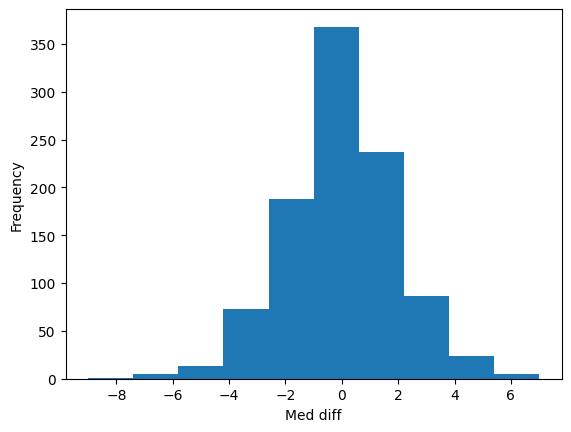

In [87]:
# Kết quả làm kiểm tra toán từ 2 nhóm
# A: học online
# B: học sách giáo khoa
# 30 câu trắc nghiệm, mỗi câu 1 điểm

def do_the_test():
    n = 100
    
    # cho từng nhóm làm kiểm tra
    group_A_scores = np.asarray([np.random.randint(1, 30) for p in range(0, n)])
    group_B_scores = np.asarray([np.random.randint(1, 30) for p in range(0, n)])

    # tính số điểm median của hai nhóm
    group_A_median_scores = np.median(group_A_scores)
    group_B_median_scores = np.median(group_B_scores)
    
    # so sánh sự khác biệt điểm số
    diff_AB = group_A_median_scores - group_B_median_scores
    return diff_AB

# Thực hiện kiểm tra nhiều lần
median_diffs = []
for i in range(0, 1000):
    median_diffs.append(do_the_test())

# biểu diễn bằng histogram    
plt.hist(median_diffs)
plt.xlabel("Med diff")
plt.ylabel("Frequency")
plt.show()

In [89]:
# 1. Chia quần thể thành digital và text group
n_digital_group = 130
n_text_group = 80

digital_mean = 15.8
text_mean = 14.5

digital_std = 2.8
text_std = 2.6

diff_of_mean = digital_mean - text_mean
print( "Difference mean scores:", diff_of_mean)

Difference mean scores: 1.3000000000000007


In [90]:
# 2. Chuẩn bị các thông số

# tính standard error
SE = math.sqrt(digital_std**2 / n_digital_group + text_std**2 / n_text_group)
print( "Standard error giữa hai nhóm lấy mẫu:", SE)

# tính khoảng tin cậy
critical_value = stats.norm.ppf(0.975)
ucl = diff_of_mean + critical_value * SE
lcl = diff_of_mean - critical_value * SE
print( "UCL:", ucl)
print( "LCL:", lcl)

Standard error giữa hai nhóm lấy mẫu: 0.3805360591424843
UCL: 2.045836970738074
LCL: 0.5541630292619275


In [91]:
# 3. Thực hiện kiểm định giả thuyết
# H0: cho rằng học online không có gì khác học sách giáo khoa. Nghĩa là mean1 - mean2 = 0
# H1: cho rằng học online tốt hơn học sách giáo khoa. Nghĩa là mean1 - mean2 > 0
# Chọn significant level (alpha, mức ý nghĩa) = 1%
# Ở đây là population nên ta sẽ chọn Z-statistic để test

$$z = \frac{(\bar{x_1} - \bar{x_2}) - (\mu_1 - \mu_2)}{SE} = \frac{\bar{x_1} - \bar{x_2}}{SE} \ (assuming \ no \ differences: \mu_1 = \mu_2)$$

In [92]:
z = diff_of_mean / SE
print( "Z-score:", z)

critical_value = stats.norm.ppf(0.99)
print( "Critical value:", critical_value)

if z > critical_value:
    print( "Reject H0 => học online tốt hơn học sách giáo khoa")
else:
    print( "Reject Ha => học online không có gì khác học sách giáo khoa")

Z-score: 3.4162334127532477
Critical value: 2.3263478740408408
Reject H0 => học online tốt hơn học sách giáo khoa


### Chi-Square
Còn gọi là goodness-of-fit test: dùng để test các thống kê có phân hoạch theo chu kỳ hay nhóm
$$X^2 = \sum \frac{(observed - expected)^2}{expected}$$
**Bài toán: báo cáo lượt view trong tuần từ phía Facebook có khác Google không?**
- H0: hai báo cáo là như nhau
- Ha: hai báo cáo là khác nhau

In [95]:
# số lượt view trong tuần phía Facebook
facebook_page_view_report = np.asarray([30, 50, 60, 60])

# số lượt view trong tuần phía Google
google_page_view_report = np.asarray([45, 48, 55, 52])

# calculate Chi-square
diff_observed = (google_page_view_report - facebook_page_view_report)**2
facebook_inverse = 1.0 / facebook_page_view_report
X2 = np.inner(diff_observed, facebook_inverse)
print( "Chi-square:", X2)

# compare with critical value
k = facebook_page_view_report.size
dof = k - 1
critical_value = stats.chi2.ppf(0.95, dof)
print( "Critical value:", critical_value)

if X2 > critical_value:
    print( "Reject H0 => hai báo cáo là khác nhau")
else:
    print( "Reject Ha => hai báo cáo là như nhau")

Chi-square: 9.063333333333334
Critical value: 7.814727903251179
Reject H0 => hai báo cáo là khác nhau
